In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib
from sklearn import metrics 
from google.colab import files

Using matplotlib backend: agg


In [9]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/DT/E-waste data set.xlsx"
df = pd.read_excel(path)

Mounted at /content/drive


In [10]:
col_names = ['Timestamp','District','Gender','Age','Educational_Level','Income_LevelM','Ewaste_Awareness','If_yes','Policy_Awareness','Life_Expect_AC',
             'Life_Expect_Lap','Life_Expect_LED','Life_Expect_Washing_Machine','Life_Expect_Cal','Life_Expect_Mobile','Reasons_discard_EOL',
             'Reasons_discard_TechObs','Reasons_discard_RepairCost','Reasons_discard_InabRepair','Reasons_discard_Update','Reasons_discard_Other',
             'Still_Usable_GenWaste','Still_Usable_OutCombus','Still_Usable_RecyCent','Still_Usable_SaleScrapMetal','Still_Usable_Resale','Still_Usable_Reuse',
             'Still_Usable_Other','Broken_EEE_GenWaste','Broken_EEE_OutCombus','Broken_EEE_RecyCent','Broken_EEE_Repair','Broken_EEE_SaleScrapMetal',
             'Broken_EEE_Resale','Broken_EEE_StoreHome','Broken_EEE_Other','Awareness_EWaste_Center','Preferable_Method_to_Dispose_EWaste',
             'IF_not_Y','WTE_frige','WTE_TV','WTE_LED','WTE_Printer','WTE_vedio_cam','WTE_Land_Phone',
             'Satisfaction_Current_EWaste_Mngt','Caring_Convinence','Responsible_Party','Believe_adverse_effect_EWaste_Human',
             'Believe_adverse_effect_EWaste_Env','Need_for_Further_Awareness','WTP_for_Effective_Ewaste_Disposal']
df = df.set_axis(col_names, axis=1, inplace=False)

In [11]:
df.head()

,Timestamp,District,Gender,Age,Educational_Level,Income_LevelM,Ewaste_Awareness,If_yes,Policy_Awareness,Life_Expect_AC,...,WTE_Printer,WTE_vedio_cam,WTE_Land_Phone,Satisfaction_Current_EWaste_Mngt,Caring_Convinence,Responsible_Party,Believe_adverse_effect_EWaste_Human,Believe_adverse_effect_EWaste_Env,Need_for_Further_Awareness,WTP_for_Effective_Ewaste_Disposal
0,2021-12-11 11:10:55.108,Ratnapura,Male,35,Graduate,"120,000 - 150,000",Yes,"Cell phones, Televisions, Refrigerators, LED b...",Yes,4 years or more,...,No,No,No,Normal,Usually concerned,Yourself,Strongly agrees,Strongly agrees,Yes,Yes
1,2021-12-11 12:35:42.333,Gampaha,Male,31,Diploma,"60,000 - 90,000",Yes,"Cell phones, Televisions, Refrigerators, LED b...",No,4 years or more,...,Yes,Yes,No,Dissatisfied,Usually concerned,"Yourself, The government, Manufacturers",Strongly agrees,Strongly agrees,Yes,No
2,2021-12-11 13:34:23.102,Colombo,Male,33,Graduate,"120,000 - 150,000",Yes,"Cell phones, Televisions, Refrigerators, LED b...",No,3 years,...,Yes,Yes,Yes,Dissatisfied,Is somewhat concerned,"Yourself, The government, Manufacturers",Agree to some extent,Agree to some extent,Yes,Yes
3,2021-12-11 14:23:59.835,Colombo,Male,32,Graduate,"90,000 - 120,000",Yes,"Cell phones, Televisions, Refrigerators, LED b...",No,4 years or more,...,Yes,No,Yes,Normal,Is concerned,"Yourself, The government",Strongly agrees,Strongly agrees,Yes,Yes
4,2021-12-13 18:56:34.426,Puttalam,Male,25,Diploma,"30,000 - 60,000",Yes,"Paper, Computer, Furniture, Mobile phone",Yes,4 years or more,...,Yes,Yes,Yes,Strongly dissatisfied,Is concerned,"Yourself, The government, Manufacturers",Agree,Strongly agrees,Yes,No


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 52 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Timestamp                            727 non-null    datetime64[ns]
 1   District                             727 non-null    object        
 2   Gender                               727 non-null    object        
 3   Age                                  727 non-null    int64         
 4   Educational_Level                    727 non-null    object        
 5   Income_LevelM                        727 non-null    object        
 6   Ewaste_Awareness                     727 non-null    object        
 7   If_yes                               492 non-null    object        
 8   Policy_Awareness                     727 non-null    object        
 9   Life_Expect_AC                       727 non-null    object        
 10  Life_Expect_La

In [13]:
df.drop("Timestamp",axis=1,inplace=True)

In [14]:
df = df.drop(["IF_not_Y"], axis=1) # no neeed

In [15]:
df['If_yes'].unique()

array(['Cell phones, Televisions, Refrigerators, LED bulbs',
       'Paper, Computer, Furniture, Mobile phone', nan,
       'Furniture, Fabrics, Glass, Paper',
       'Cell phones, televisions, refrigerators, LED bulbs'], dtype=object)

In [16]:
### using map function for change vategory to integer
df['If_yes']=df['If_yes'].map({'Cell phones, Televisions, Refrigerators, LED bulbs':0,'Paper, Computer, Furniture, Mobile phone':1, 'Furniture, Fabrics, Glass, Paper':2,'Cell phones, televisions, refrigerators, LED bulbs':3})#hndling category feautures

In [17]:
df['If_yes'].isnull().sum()

235

In [18]:
df['If_yes']=df['If_yes'].fillna(df['If_yes']).mean()

In [19]:
df['If_yes'].isnull().sum()

0

In [20]:
df['Responsible_Party'].unique()

array(['Yourself', 'Yourself, The government, Manufacturers',
       'Yourself, The government', 'The government',
       'Yourself, Manufacturers', 'The government, Manufacturers',
       'Manufacturers'], dtype=object)

In [21]:
df['Responsible_Party']=df['Responsible_Party'].map({'Yourself':0,'Yourself, The government, Manufacturers':1,'Yourself, The government':2,'The government':3,'Yourself, Manufacturers':4,'The government, Manufacturers':5,'Manufacturers':6})#hndling category feautures

In [22]:
df['Responsible_Party'].isnull().sum()

0

In [23]:
df['Income_LevelM'].unique()

array(['120,000 - 150,000', '60,000 - 90,000', '90,000 - 120,000',
       '30,000 - 60,000', '150,000 or more', 'Do not earn income yet',
       'Less than 30,000'], dtype=object)

In [24]:
df['Income_LevelM']=df['Income_LevelM'].map({'Do not earn income yet':0,'Less than 30,000':1,'30,000 - 60,000':2,'60,000 - 90,000':3,'90,000 - 120,000':4,'120,000 - 150,000':5,'150,000 or more':6})#hndling category feautures

In [25]:
df['Income_LevelM'].isnull().sum()

0

In [26]:
### replace sam as mapping
df.replace(
                   {'Life_Expect_AC': {'4 years or more':4, '3 years':3, '1 year':1, '2 years':2},
                   'Life_Expect_Lap': {'4 years or more':4, '3 years':3, '1 year':1, '2 years':2},
                   'Life_Expect_LED': {'4 years or more':4, '3 years':3, '1 year':1, '2 years':2},
                   'Life_Expect_Washing_Machine': {'4 years or more':4, '3 years':3, '1 year':1, '2 years':2},
                  'Life_Expect_Cal': {'4 years or more':4, '3 years':3, '1 year':1, '2 years':2},
                  'Life_Expect_Mobile': {'4 years or more':4, '3 years':3, '1 year':1, '2 years':2},
                  'Awareness_EWaste_Center': {'Yes':1, 'Not aware':3, 'No':2},
                  'Preferable_Method_to_Dispose_EWaste': {'Come home and collect':1,'Handing over to an intermediary':2,'Taken to a recycling center and handed over':3}, 
                  'Satisfaction_Current_EWaste_Mngt': {'Strongly satisfied':5,'Satisfied':4,'Normal':3,'Dissatisfied':2,'Strongly dissatisfied':1},
                  'Caring_Convinence': {'Does not care':5,'Is somewhat concerned':4,'Usually concerned':3,'Is concerned':2,'Definitely care':1},
                  'Believe_adverse_effect_EWaste_Human': {'Strongly agrees':5,'Agree':4,'Agree to some extent':3,'Do not agree':2,'Strongly disagree':1},
                  'Believe_adverse_effect_EWaste_Env': {'Strongly agrees':5,'Agree':4,'Agree to some extent':3,'Do not agree':2,'Strongly disagree':1}},
                  inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 50 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   District                             727 non-null    object 
 1   Gender                               727 non-null    object 
 2   Age                                  727 non-null    int64  
 3   Educational_Level                    727 non-null    object 
 4   Income_LevelM                        727 non-null    int64  
 5   Ewaste_Awareness                     727 non-null    object 
 6   If_yes                               727 non-null    float64
 7   Policy_Awareness                     727 non-null    object 
 8   Life_Expect_AC                       727 non-null    int64  
 9   Life_Expect_Lap                      727 non-null    int64  
 10  Life_Expect_LED                      727 non-null    int64  
 11  Life_Expect_Washing_Machine     

In [28]:
df.isnull().sum()

District                                 0
Gender                                   0
Age                                      0
Educational_Level                        0
Income_LevelM                            0
Ewaste_Awareness                         0
If_yes                                   0
Policy_Awareness                         0
Life_Expect_AC                           0
Life_Expect_Lap                          0
Life_Expect_LED                          0
Life_Expect_Washing_Machine              0
Life_Expect_Cal                          0
Life_Expect_Mobile                       0
Reasons_discard_EOL                    225
Reasons_discard_TechObs                357
Reasons_discard_RepairCost             373
Reasons_discard_InabRepair             325
Reasons_discard_Update                 560
Reasons_discard_Other                  722
Still_Usable_GenWaste                  568
Still_Usable_OutCombus                 670
Still_Usable_RecyCent                  543
Still_Usabl

In [29]:
### label encoding which contain only two possiblites variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Ewaste_Awareness']=label_encoder.fit_transform(df['Ewaste_Awareness'])
df['Policy_Awareness']=label_encoder.fit_transform(df['Policy_Awareness'])
df['Gender']=label_encoder.fit_transform(df['Gender'])
df['WTE_TV']=label_encoder.fit_transform(df['WTE_TV'])
df['WTE_LED']=label_encoder.fit_transform(df['WTE_LED'])
df['WTE_frige']=label_encoder.fit_transform(df['WTE_frige'])
df['WTE_Printer']=label_encoder.fit_transform(df['WTE_Printer'])
df['WTE_vedio_cam']=label_encoder.fit_transform(df['WTE_vedio_cam'])
df['WTE_Land_Phone']=label_encoder.fit_transform(df['WTE_Land_Phone'])
df['Need_for_Further_Awareness']=label_encoder.fit_transform(df['Need_for_Further_Awareness'])
df['WTP_for_Effective_Ewaste_Disposal']=label_encoder.fit_transform(df['WTP_for_Effective_Ewaste_Disposal'])


In [30]:
df.tail(2)

,District,Gender,Age,Educational_Level,Income_LevelM,Ewaste_Awareness,If_yes,Policy_Awareness,Life_Expect_AC,Life_Expect_Lap,...,WTE_Printer,WTE_vedio_cam,WTE_Land_Phone,Satisfaction_Current_EWaste_Mngt,Caring_Convinence,Responsible_Party,Believe_adverse_effect_EWaste_Human,Believe_adverse_effect_EWaste_Env,Need_for_Further_Awareness,WTP_for_Effective_Ewaste_Disposal
725,Batticaloa,1,21,G.C.E. A/L,1,1,1.426829,0,1,2,...,0,0,0,5,1,3,1,1,1,0
726,Batticaloa,1,24,Undergraduate,0,1,1.426829,0,3,4,...,0,0,0,4,2,5,1,1,1,0


In [31]:
df['If_yes']=df['If_yes'].astype(int)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 50 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   District                             727 non-null    object
 1   Gender                               727 non-null    int64 
 2   Age                                  727 non-null    int64 
 3   Educational_Level                    727 non-null    object
 4   Income_LevelM                        727 non-null    int64 
 5   Ewaste_Awareness                     727 non-null    int64 
 6   If_yes                               727 non-null    int64 
 7   Policy_Awareness                     727 non-null    int64 
 8   Life_Expect_AC                       727 non-null    int64 
 9   Life_Expect_Lap                      727 non-null    int64 
 10  Life_Expect_LED                      727 non-null    int64 
 11  Life_Expect_Washing_Machine          727 non-

In [33]:
#### use dummy trap 
data=pd.get_dummies(df, columns=['District','Educational_Level',
                                       'Reasons_discard_EOL','Reasons_discard_TechObs','Reasons_discard_RepairCost','Reasons_discard_InabRepair',
                                       'Reasons_discard_Update','Reasons_discard_Other','Still_Usable_GenWaste','Still_Usable_OutCombus','Still_Usable_RecyCent',
                                       'Still_Usable_SaleScrapMetal','Still_Usable_Resale','Still_Usable_Reuse','Still_Usable_Other','Broken_EEE_GenWaste',
                                       'Broken_EEE_OutCombus','Broken_EEE_RecyCent','Broken_EEE_Repair','Broken_EEE_SaleScrapMetal','Broken_EEE_Resale',
                                       'Broken_EEE_StoreHome','Broken_EEE_Other'],drop_first=True)
data

,Gender,Age,Income_LevelM,Ewaste_Awareness,If_yes,Policy_Awareness,Life_Expect_AC,Life_Expect_Lap,Life_Expect_LED,Life_Expect_Washing_Machine,...,Still_Usable_Reuse_Reuse,Broken_EEE_GenWaste_Disposal as general waste,Broken_EEE_OutCombus_ Outdoor combustion in the open air,Broken_EEE_OutCombus_Outdoor combustion,Broken_EEE_RecyCent_Transfer to a recycling center,Broken_EEE_Repair_Repair by a technician,Broken_EEE_SaleScrapMetal_Sale to scrap metal collectors,Broken_EEE_Resale_Resale,Broken_EEE_StoreHome_ Store at home,Broken_EEE_StoreHome_Store at home
0,1,35,5,1,1,1,4,4,2,4,...,0,0,0,0,1,0,0,0,0,0
1,1,31,3,1,1,0,4,3,1,4,...,0,0,0,0,1,0,0,0,0,0
2,1,33,5,1,1,0,3,3,1,3,...,0,0,0,0,0,0,1,0,0,0
3,1,32,4,1,1,0,4,3,2,4,...,0,0,0,0,1,0,0,0,0,0
4,1,25,2,1,1,1,4,4,4,4,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,0,27,2,0,1,0,1,3,3,4,...,1,0,0,0,0,1,0,0,0,0
723,1,35,0,0,1,0,2,2,2,2,...,1,0,0,0,0,1,0,0,0,0
724,1,35,2,1,1,0,2,1,2,2,...,0,0,0,0,0,0,1,0,0,0
725,1,21,1,1,1,0,1,2,1,1,...,0,0,0,0,0,0,0,1,0,0


In [34]:
data.shape

(727, 83)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 83 columns):
 #   Column                                                      Non-Null Count  Dtype
---  ------                                                      --------------  -----
 0   Gender                                                      727 non-null    int64
 1   Age                                                         727 non-null    int64
 2   Income_LevelM                                               727 non-null    int64
 3   Ewaste_Awareness                                            727 non-null    int64
 4   If_yes                                                      727 non-null    int64
 5   Policy_Awareness                                            727 non-null    int64
 6   Life_Expect_AC                                              727 non-null    int64
 7   Life_Expect_Lap                                             727 non-null    int64
 8   Life_Expect_LED     

In [36]:
data.shape

(727, 83)

In [37]:
data.to_csv('sample.csv', encoding='utf-8-sig')
#files.download('sample.csv')



In [38]:
data.isnull().sum()

Gender                                                      0
Age                                                         0
Income_LevelM                                               0
Ewaste_Awareness                                            0
If_yes                                                      0
                                                           ..
Broken_EEE_Repair_Repair by a technician                    0
Broken_EEE_SaleScrapMetal_Sale to scrap metal collectors    0
Broken_EEE_Resale_Resale                                    0
Broken_EEE_StoreHome_ Store at home                         0
Broken_EEE_StoreHome_Store at home                          0
Length: 83, dtype: int64

In [39]:
data.head(2)

,Gender,Age,Income_LevelM,Ewaste_Awareness,If_yes,Policy_Awareness,Life_Expect_AC,Life_Expect_Lap,Life_Expect_LED,Life_Expect_Washing_Machine,...,Still_Usable_Reuse_Reuse,Broken_EEE_GenWaste_Disposal as general waste,Broken_EEE_OutCombus_ Outdoor combustion in the open air,Broken_EEE_OutCombus_Outdoor combustion,Broken_EEE_RecyCent_Transfer to a recycling center,Broken_EEE_Repair_Repair by a technician,Broken_EEE_SaleScrapMetal_Sale to scrap metal collectors,Broken_EEE_Resale_Resale,Broken_EEE_StoreHome_ Store at home,Broken_EEE_StoreHome_Store at home
0,1,35,5,1,1,1,4,4,2,4,...,0,0,0,0,1,0,0,0,0,0
1,1,31,3,1,1,0,4,3,1,4,...,0,0,0,0,1,0,0,0,0,0


In [40]:
data.shape

(727, 83)

Feature Engineering part to reduce the coulumns


In [41]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [42]:
## split the existing data 
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(
    data.drop(labels=['WTP_for_Effective_Ewaste_Disposal'],axis=1),
    data['WTP_for_Effective_Ewaste_Disposal'],
    test_size=0.3,
    random_state=0
)


In [43]:
X_train.shape, X_test.shape

((508, 82), (219, 82))

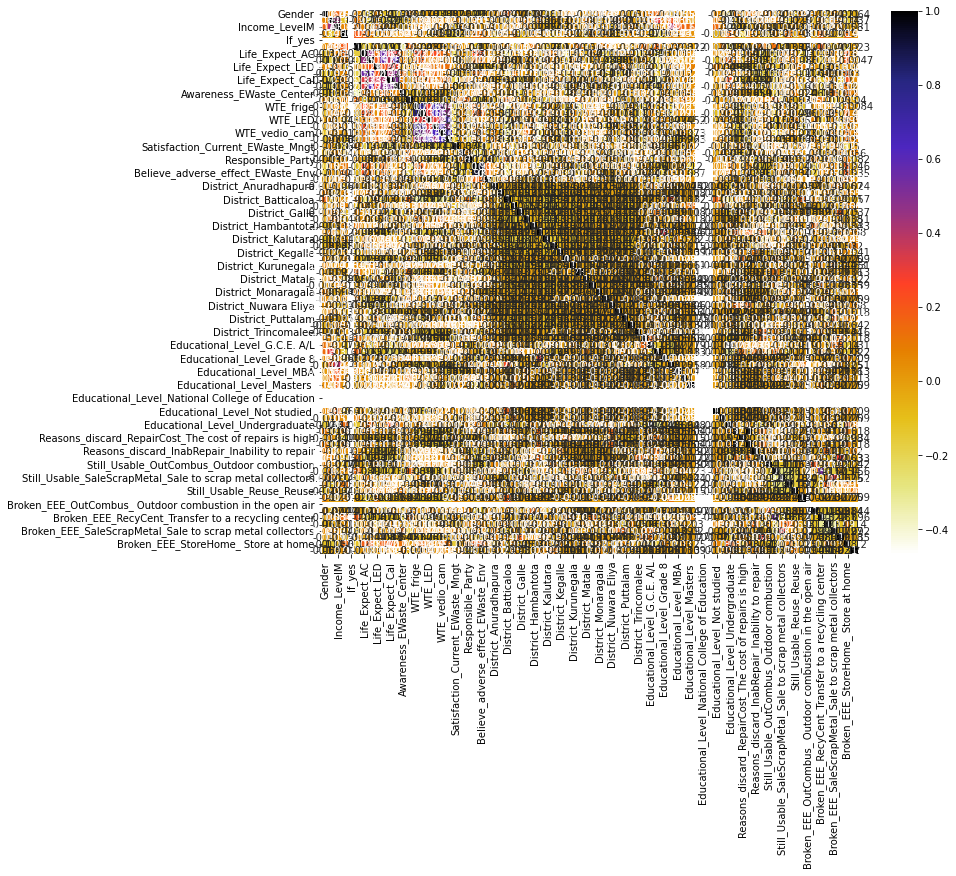

In [44]:
### Heatmap for correlation 
import seaborn as sns
#using pearson correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()


In [45]:
## using correlation technique to reduce coulumns
## here we can reduce coulumns which independant variables correlated together
## bcz we can take one feature while correlating each other

In [46]:
threshold=0.5

In [47]:
# with the following function we can slect highly correlaged feature
#it will remove the first feaure that is correlatd with anythingg other feautre

def correlation(dataset, threshold):
    col_corr = set() #set all thr names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are intresred absolute coeff value
                colname = corr_matrix.columns[i]# getting tyhe name colukns
                col_corr.add(colname)
    return col_corr

In [48]:
corr_features = correlation(X_train, 0.5)
len(set(corr_features))

9

In [49]:
#### correlated features 
corr_features

{'Believe_adverse_effect_EWaste_Env',
 'Broken_EEE_RecyCent_Transfer to a recycling center',
 'Life_Expect_Mobile',
 'Life_Expect_Washing_Machine',
 'Reasons_discard_InabRepair_ inability to repair',
 'WTE_Land_Phone',
 'WTE_Printer',
 'WTE_TV',
 'WTE_vedio_cam'}

In [50]:
### deduct the feature in train and test data set seperatly
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)


In [51]:
X_train.shape

(508, 73)

usign variance 

In [52]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

In [53]:
# Apply thr variance thershold
#it will drop 0.1 variance columns
var_thres=VarianceThreshold(threshold=0.1)
var_thres.fit(X_train)

VarianceThreshold(threshold=0.1)

In [54]:

###finding non constant features
sum(var_thres.get_support())

30

In [55]:
var_thres.get_support()

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True,  True,
        True, False, False, False, False,  True,  True, False,  True,
       False])

In [56]:
constant_columns = [column for column in X_train.columns
                   if column not in X_train.columns[var_thres.get_support()]]
print(len(constant_columns))

43


In [57]:
for column in constant_columns:
    print(column)

If_yes
District_Anuradhapura
District_Badulla
District_Batticaloa
District_Galle
District_Hambantota
District_Jaffna
District_Kandy
District_Kegalle
District_Kilinochchi
District_Kurunegala
District_Mannar
District_Matale
District_Matara
District_Monaragala
District_Mullaitivu
District_Nuwara Eliya
District_Polonnaruwa
District_Puttalam
District_Ratnapura
District_Trincomalee
District_Vavuniya
Educational_Level_G.C.E. O/L
Educational_Level_Grade 8
Educational_Level_MBA
Educational_Level_Masters
Educational_Level_Masters 
Educational_Level_Msc
Educational_Level_National College of Education
Educational_Level_Nil
Educational_Level_Not studied 
Educational_Level_Post graduate 
Reasons_discard_RepairCost_ The cost of repairs is high 
Reasons_discard_RepairCost_The cost of repairs is high
Reasons_discard_InabRepair_Inability to repair
Reasons_discard_Update_Having to update
Still_Usable_OutCombus_Outdoor combustion
Still_Usable_Reuse_Reuse
Broken_EEE_GenWaste_Disposal as general waste 
Brok

In [58]:
# get final datae after removing contstant coulumns
X_train.drop(constant_columns,axis=1,inplace=True)
X_test.drop(constant_columns,axis=1,inplace=True)

In [59]:
X_train.shape ### now we have columns 30 instead of 83

(508, 30)

In [60]:
y_train.shape

(508,)

In [61]:
### we have to merge train and test data after reduced seperatly
X_final_df = X_train.append(X_test)
X_final_df.head(2)

,Gender,Age,Income_LevelM,Ewaste_Awareness,Policy_Awareness,Life_Expect_AC,Life_Expect_Lap,Life_Expect_LED,Life_Expect_Cal,Awareness_EWaste_Center,...,District_Kalutara,Educational_Level_G.C.E. A/L,Educational_Level_Graduate,Educational_Level_Undergraduate,Still_Usable_RecyCent_Transfer to a recycling center,Still_Usable_SaleScrapMetal_Sale to scrap metal collectors,Still_Usable_Resale_Resale,Broken_EEE_Repair_Repair by a technician,Broken_EEE_SaleScrapMetal_Sale to scrap metal collectors,Broken_EEE_StoreHome_ Store at home
427,0,21,0,1,0,2,3,1,1,2,...,0,0,0,1,1,0,0,0,0,1
570,0,53,0,1,0,4,4,2,2,2,...,1,1,0,0,1,0,0,1,0,0


In [62]:
### here adding Target featute with data set but it comes as series
y_final_df = data['WTP_for_Effective_Ewaste_Disposal']
y_final = y_final_df.to_frame(name='WTP_for_Effective_Ewaste_Disposal') ### cange as dataframe
print(type(df))
y_final.head

<class 'pandas.core.frame.DataFrame'>


<bound method NDFrame.head of      WTP_for_Effective_Ewaste_Disposal
0                                    1
1                                    0
2                                    1
3                                    1
4                                    0
..                                 ...
722                                  0
723                                  0
724                                  1
725                                  0
726                                  0

[727 rows x 1 columns]>

In [63]:
### merge feature and target variable after finished feature slection part
final_df = pd.merge(X_final_df, y_final, left_index=True, right_index=True, how="outer")
final_df.head(2)

,Gender,Age,Income_LevelM,Ewaste_Awareness,Policy_Awareness,Life_Expect_AC,Life_Expect_Lap,Life_Expect_LED,Life_Expect_Cal,Awareness_EWaste_Center,...,Educational_Level_G.C.E. A/L,Educational_Level_Graduate,Educational_Level_Undergraduate,Still_Usable_RecyCent_Transfer to a recycling center,Still_Usable_SaleScrapMetal_Sale to scrap metal collectors,Still_Usable_Resale_Resale,Broken_EEE_Repair_Repair by a technician,Broken_EEE_SaleScrapMetal_Sale to scrap metal collectors,Broken_EEE_StoreHome_ Store at home,WTP_for_Effective_Ewaste_Disposal
0,1,35,5,1,1,4,4,2,4,1,...,0,1,0,0,0,1,0,0,0,1
1,1,31,3,1,0,4,3,1,1,1,...,0,0,0,1,0,0,0,0,0,0


Model Creation - Decision Tree


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import export_graphviz 
from IPython.display import Image 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from six import StringIO


In [65]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 727 entries, 0 to 726
Data columns (total 31 columns):
 #   Column                                                      Non-Null Count  Dtype
---  ------                                                      --------------  -----
 0   Gender                                                      727 non-null    int64
 1   Age                                                         727 non-null    int64
 2   Income_LevelM                                               727 non-null    int64
 3   Ewaste_Awareness                                            727 non-null    int64
 4   Policy_Awareness                                            727 non-null    int64
 5   Life_Expect_AC                                              727 non-null    int64
 6   Life_Expect_Lap                                             727 non-null    int64
 7   Life_Expect_LED                                             727 non-null    int64
 8   Life_Expect_Cal     

In [66]:

feature_cols = ['Gender', 'Age','Income_LevelM','Ewaste_Awareness',
                'Policy_Awareness','Life_Expect_AC','Life_Expect_Lap','Life_Expect_LED','Life_Expect_Cal',
                'Awareness_EWaste_Center','Preferable_Method_to_Dispose_EWaste','WTE_frige','WTE_LED','Satisfaction_Current_EWaste_Mngt',
                'Caring_Convinence','Responsible_Party','Believe_adverse_effect_EWaste_Human','Need_for_Further_Awareness','District_Colombo','District_Gampaha','District_Kalutara','Educational_Level_G.C.E. A/L',
                'Educational_Level_Graduate','Educational_Level_Undergraduate','Still_Usable_RecyCent_Transfer to a recycling center',
                'Still_Usable_SaleScrapMetal_Sale to scrap metal collectors','Still_Usable_Resale_Resale','Broken_EEE_Repair_Repair by a technician',
                'Broken_EEE_SaleScrapMetal_Sale to scrap metal collectors','Broken_EEE_StoreHome_ Store at home']
X = final_df[feature_cols]
y= final_df['WTP_for_Effective_Ewaste_Disposal']

In [67]:
## splti the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state = 0)


In [68]:
### create model
classifier = DecisionTreeClassifier()

In [69]:
# fit the train and test data into model
clf = classifier.fit(X_train, y_train)

In [70]:
# Predict the reponse for test dataset
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [71]:
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.5163398692810458


In [72]:
'''
from sklearn import tree
plt.figure(figsize=(50,40))
tree.plot_tree(clf,filled=True)
'''

'\nfrom sklearn import tree\nplt.figure(figsize=(50,40))\ntree.plot_tree(clf,filled=True)\n'

In [73]:
### import latest version
!pip install --upgrade scikit-learn==0.20.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.4 MB 6.4 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.20.3 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.20.3 which is incompatible.


In [74]:
pip install six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [75]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

In [76]:
### using preuning method and set depth is 4
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6)

# Train Decision Tree Classifer
clf = classifier.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.48366013071895425


In [77]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('credit.png')
Image(graph.create_png())


Output hidden; open in https://colab.research.google.com to view.

In [78]:
# lets try Random forest

Random forest


In [79]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [80]:
# Putting feature variable to X
X = final_df.drop('WTP_for_Effective_Ewaste_Disposal',axis=1)
# Putting response variable to y
y = final_df['WTP_for_Effective_Ewaste_Disposal']

In [81]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split

In [82]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((508, 30), (219, 30))

In [83]:
pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.8 MB 1.5 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3


In [84]:
from sklearn.ensemble import RandomForestClassifier ### impoer RF libraries

In [85]:
## create model usnin boosting method
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [86]:

classifier_rf.fit(X_train, y_train) ## fit the data into model

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [87]:
# checking the oob score
classifier_rf.oob_score_

0.6082677165354331

In [88]:
### doing hyper parameter tuning
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [89]:
### set the 3 parameters
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4, ### cross validation is 4
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [92]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: user 4.43 s, sys: 246 ms, total: 4.67 s
Wall time: 2min 6s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [93]:
grid_search.best_score_

0.6318897637795275

In [94]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

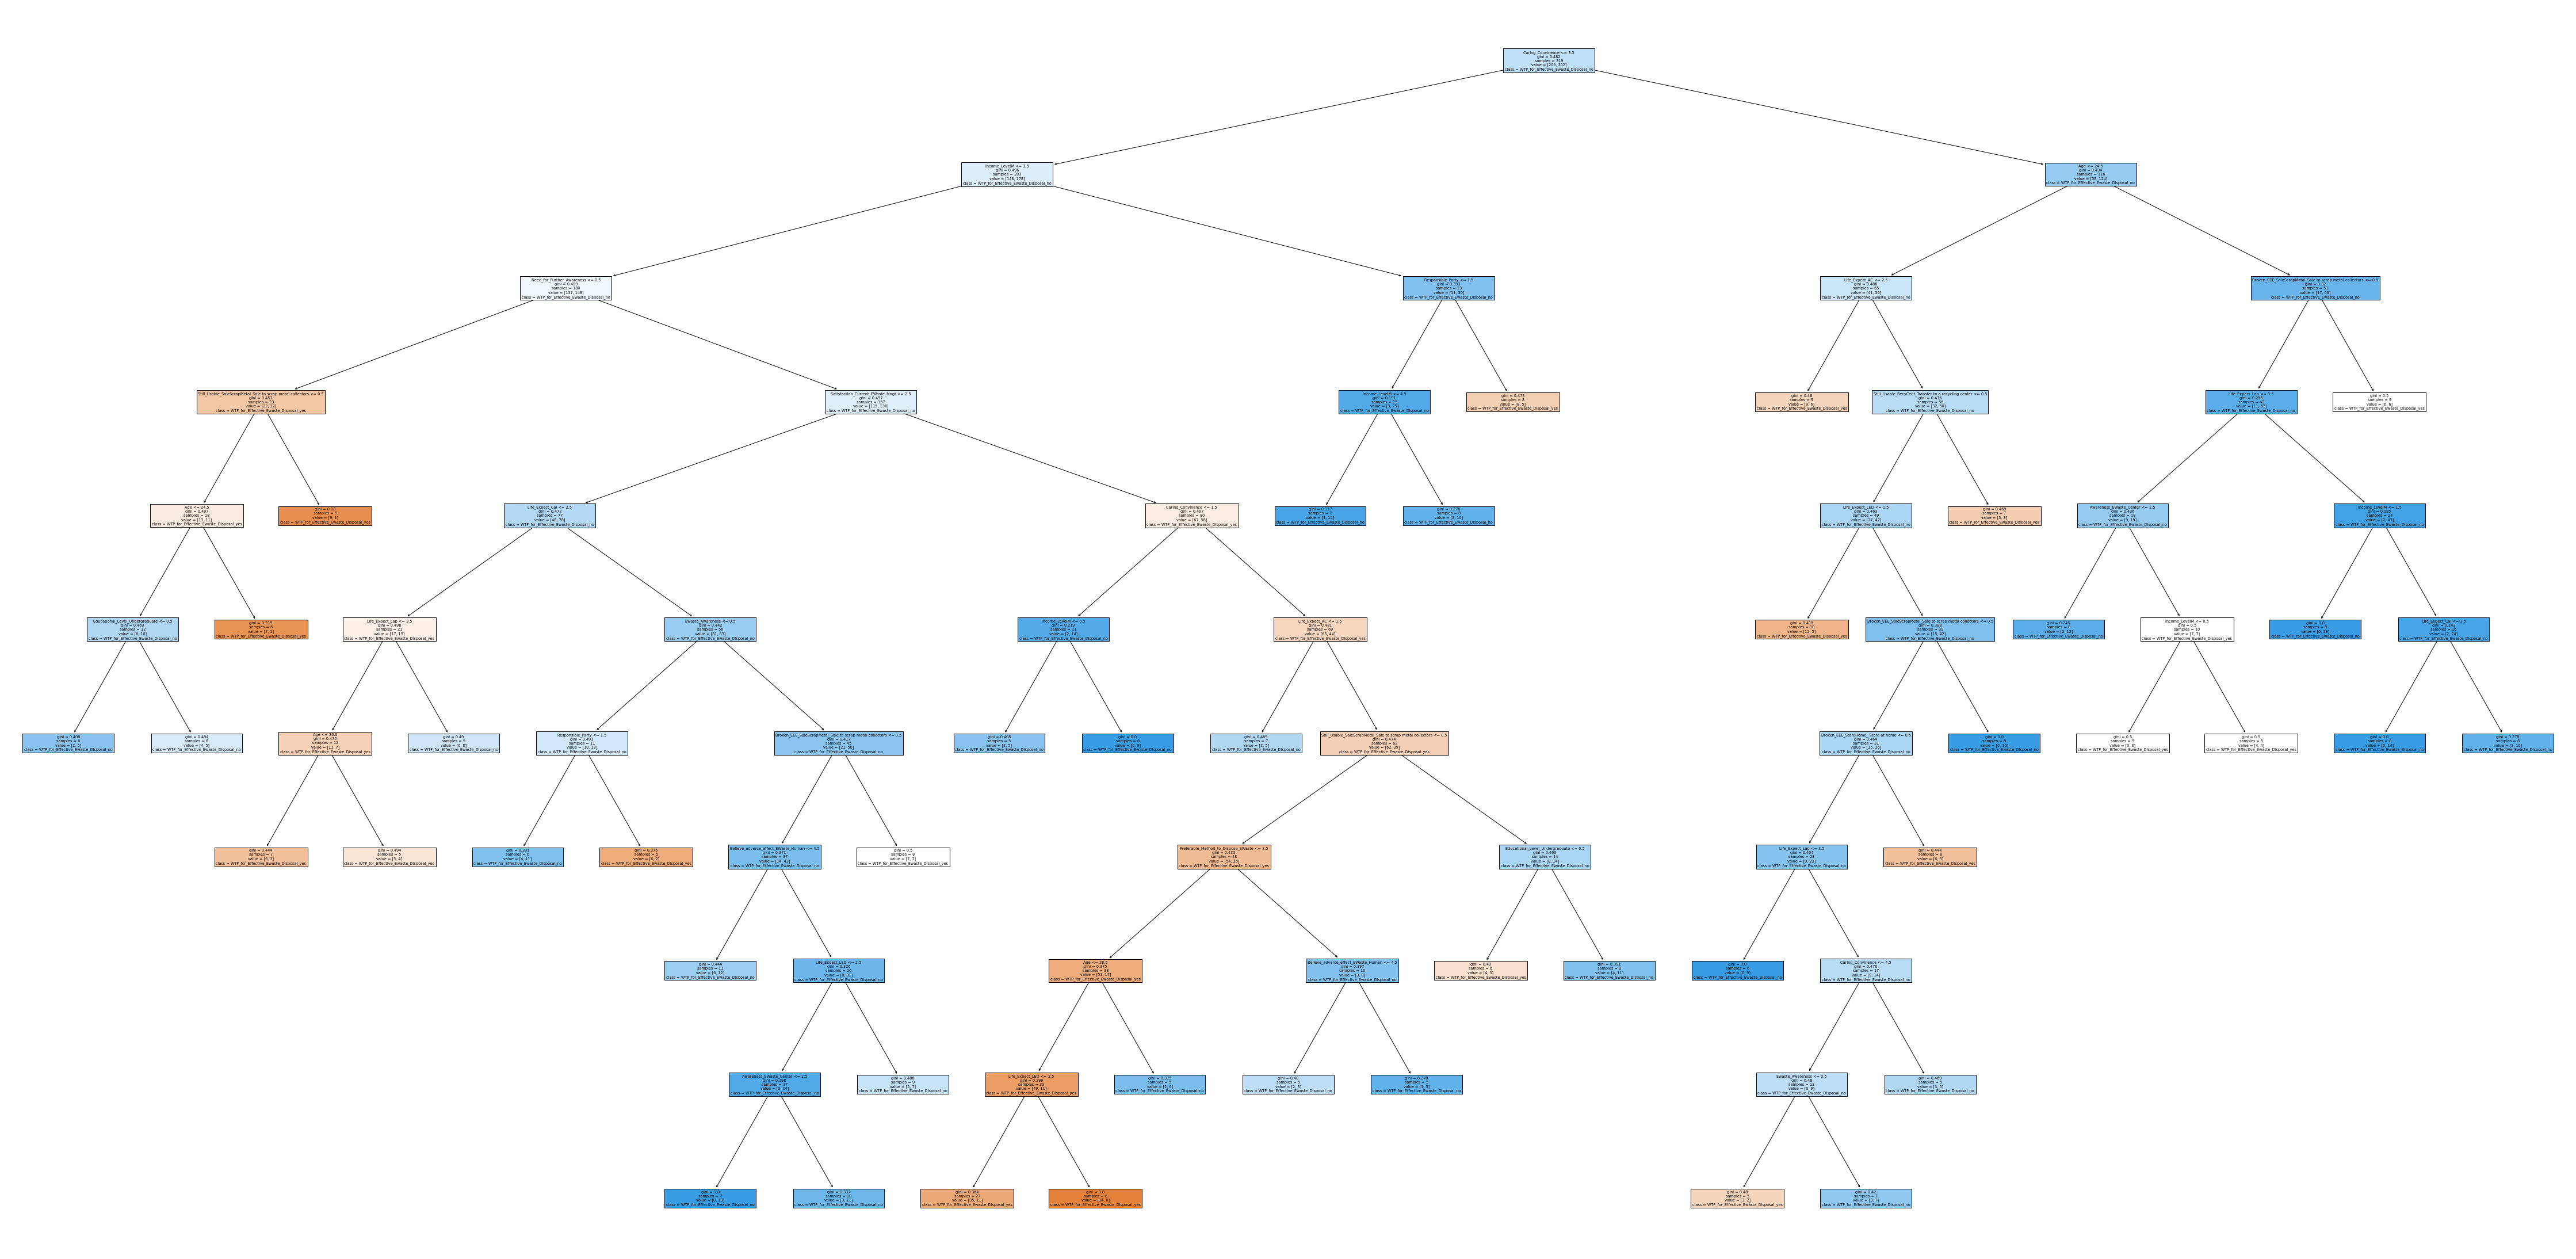

In [95]:
from sklearn.tree import plot_tree
from sklearn import tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['WTP_for_Effective_Ewaste_Disposal_yes', "WTP_for_Effective_Ewaste_Disposal_no"],filled=True);

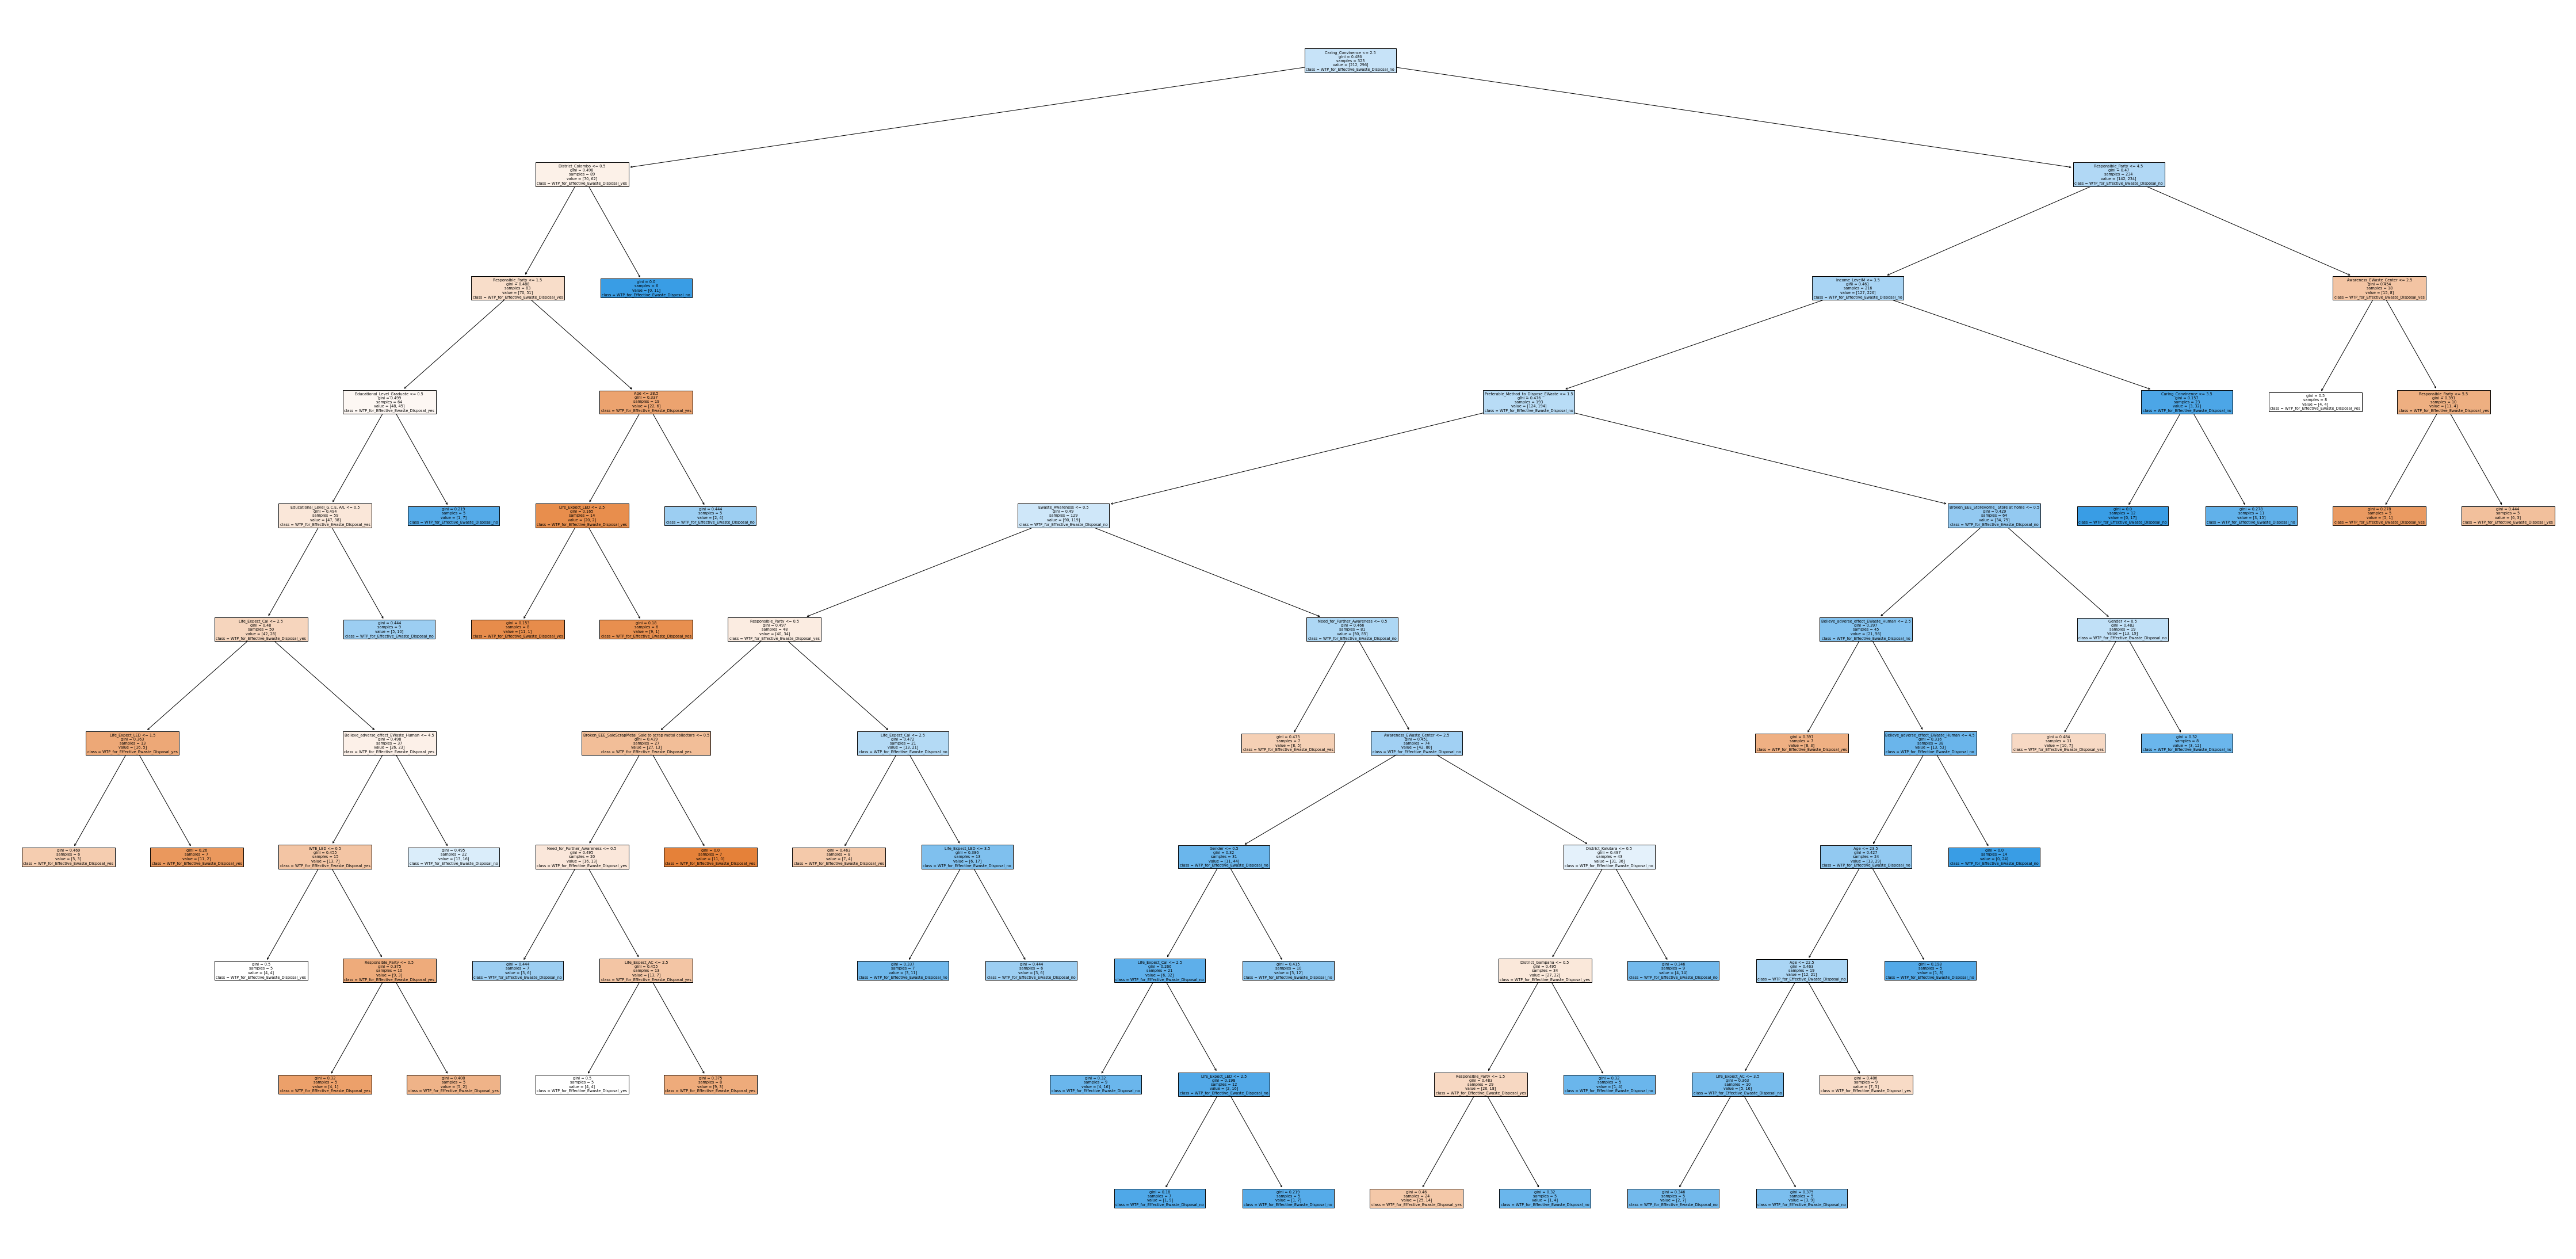

In [96]:
from sklearn.tree import plot_tree
from sklearn import tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X.columns,class_names=['WTP_for_Effective_Ewaste_Disposal_yes', "WTP_for_Effective_Ewaste_Disposal_no"],filled=True);

In [97]:
rf_best.feature_importances_

array([0.03435635, 0.09560502, 0.06400761, 0.02619562, 0.03548437,
       0.02551524, 0.02821338, 0.06502101, 0.0450183 , 0.03549532,
       0.03663335, 0.02794364, 0.03110627, 0.05427674, 0.06380261,
       0.0708837 , 0.05735937, 0.01118437, 0.00981468, 0.01611764,
       0.01905739, 0.01426633, 0.00560918, 0.02475841, 0.01866186,
       0.01838254, 0.01298237, 0.02361863, 0.01062349, 0.01800522])

In [98]:
### arange the features which is effection most
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [99]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
1,Age,0.095605
15,Responsible_Party,0.070884
7,Life_Expect_LED,0.065021
2,Income_LevelM,0.064008
14,Caring_Convinence,0.063803
16,Believe_adverse_effect_EWaste_Human,0.057359
13,Satisfaction_Current_EWaste_Mngt,0.054277
8,Life_Expect_Cal,0.045018
10,Preferable_Method_to_Dispose_EWaste,0.036633
9,Awareness_EWaste_Center,0.035495


In [102]:
import pickle


In [103]:
 filename = 'Decision_Tree_model'
 pickle.dump(classifier,open(filename,'wb'))

In [110]:
DT_model= pickle.load(open(filename,'rb'))
DT_model.predict(X_test)

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1])

# New Section

In [120]:
filename_rf = 'Rf_model'
pickle.dump(classifier_rf,open(filename_rf,'wb'))

In [121]:
random_forest = pickle.load(open(filename_rf,'rb'))
random_forest.predict(X_test)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1])